# 1. Preprocess-PreviewJson

Reference：https://www.kaggle.com/codename007/simple-exploration-notebook-furniture

## Import PKGs

In [1]:
import time
import os
import json
import csv
import zipfile
import pickle
from PIL import Image
import shutil


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline
from IPython.display import display

## Run name

In [2]:
project_name = 'ic_furniture2018'
step_name = 'Preprocess-PreviewJson'
time_str = time.strftime("%Y%m%d_%H%M%S", time.localtime())
run_name = project_name + '_' + step_name + '_' + time_str
print('run_name: ' + run_name)

run_name: ic_furniture2018_Preprocess-PreviewJson_20180329_114646


## Project folder

In [3]:
cwd = os.getcwd()
input_folder = os.path.join(cwd, 'input')
output_folder = os.path.join(cwd, 'output')
model_folder = os.path.join(cwd, 'model')
feature_folder = os.path.join(cwd, 'feature')
post_pca_feature_folder = os.path.join(cwd, 'post_pca_feature')
log_folder = os.path.join(cwd, 'log')
print('input_folder: \t\t\t%s' % input_folder)
print('output_folder: \t\t\t%s' % output_folder)
print('model_folder: \t\t\t%s' % model_folder)
print('feature_folder: \t\t%s' % feature_folder)
print('post_pca_feature_folder: \t%s' % post_pca_feature_folder)
print('log_folder: \t\t\t%s' % log_folder)

org_train_folder = os.path.join(input_folder, 'org_train')
org_val_folder = os.path.join(input_folder, 'org_val')
org_test_folder = os.path.join(input_folder, 'org_test')
train_folder = os.path.join(input_folder, 'data_train')
val_folder = os.path.join(input_folder, 'data_val')
test_folder = os.path.join(input_folder, 'data_test')
test_sub_folder = os.path.join(test_folder, 'test')

if not os.path.exists(post_pca_feature_folder):
    os.mkdir(post_pca_feature_folder)
    print('Create folder: %s' % post_pca_feature_folder)

train_json_file = os.path.join(input_folder, 'train.json')
val_json_file = os.path.join(input_folder, 'validation.json')
test_json_file = os.path.join(input_folder, 'test.json')
print('\ntrain_json_file: \t\t%s' % train_json_file)
print('val_json_file: \t\t\t%s' % val_json_file)
print('test_json_file: \t\t%s' % test_json_file)

train_csv_file = os.path.join(input_folder, 'train.csv')
val_csv_file = os.path.join(input_folder, 'validation.csv')
test_csv_file = os.path.join(input_folder, 'test.csv')
print('\ntrain_csv_file: \t\t%s' % train_csv_file)
print('val_csv_file: \t\t\t%s' % val_csv_file)
print('test_csv_file: \t\t\t%s' % test_csv_file)

sample_submission_csv_file = os.path.join(input_folder, 'sample_submission_randomlabel.csv')
print('\nsample_submission_csv_file: \t%s' % sample_submission_csv_file)

input_folder: 			/data1/kaggle/imaterialist-challenge-furniture-2018/input
output_folder: 			/data1/kaggle/imaterialist-challenge-furniture-2018/output
model_folder: 			/data1/kaggle/imaterialist-challenge-furniture-2018/model
feature_folder: 		/data1/kaggle/imaterialist-challenge-furniture-2018/feature
post_pca_feature_folder: 	/data1/kaggle/imaterialist-challenge-furniture-2018/post_pca_feature
log_folder: 			/data1/kaggle/imaterialist-challenge-furniture-2018/log

train_json_file: 		/data1/kaggle/imaterialist-challenge-furniture-2018/input/train.json
val_json_file: 			/data1/kaggle/imaterialist-challenge-furniture-2018/input/validation.json
test_json_file: 		/data1/kaggle/imaterialist-challenge-furniture-2018/input/test.json

train_csv_file: 		/data1/kaggle/imaterialist-challenge-furniture-2018/input/train.csv
val_csv_file: 			/data1/kaggle/imaterialist-challenge-furniture-2018/input/validation.csv
test_csv_file: 			/data1/kaggle/imaterialist-challenge-furniture-2018/input/test.csv


# Retrieving the Data

In [4]:
with open(train_json_file) as datafile1: #first check if it's a valid json file or not
    data1 = json.load(datafile1)
with open(val_json_file) as datafile2: #first check if it's a valid json file or not
    data2 = json.load(datafile2)
with open(test_json_file) as datafile3: #first check if it's a valid json file or not
    data3 = json.load(datafile3)
# test = pd.DataFrame(data2)    
# test.shape

## Convertng JSON format data into Tabular data

In [5]:
%%time
# for training data
my_dic_data = data1
keys = my_dic_data.keys()
dict_you_want1 = {'my_items1': my_dic_data['annotations'] for key in keys}
dict_you_want2 = {'my_items2': my_dic_data['images'] for key in keys}
df = pd.DataFrame(dict_you_want1)
fd = pd.DataFrame(dict_you_want2)

df2 = df['my_items1'].apply(pd.Series)
display("df2", df2.head())
fd2 = fd['my_items2'].apply(pd.Series)
display("fd2", fd2.head())
train_data = pd.merge(df2, fd2, on='image_id', how='outer')

# for val data
my_dic_data = data2
keys = my_dic_data.keys()
dict_you_want1 = {'my_items1': my_dic_data['annotations'] for key in keys}
dict_you_want2 = {'my_items2': my_dic_data['images'] for key in keys}
df = pd.DataFrame(dict_you_want1)
fd = pd.DataFrame(dict_you_want2)

df2 = df['my_items1'].apply(pd.Series)
display("df2", df2.head())
fd2 = fd['my_items2'].apply(pd.Series)
display("fd2", fd2.head())
val_data = pd.merge(df2, fd2, on='image_id', how='outer')

# for test data
my_dic_data = data3
keys = my_dic_data.keys()
dict_you_want2 = {'my_items2': my_dic_data['images'] for key in keys}
fd = pd.DataFrame(dict_you_want2)
test_data = fd['my_items2'].apply(pd.Series)

'df2'

,image_id,label_id
0,1,5
1,2,5
2,3,5
3,4,5
4,5,5


'fd2'

,image_id,url
0,1,[https://img13.360buyimg.com/imgzone/jfs/t2857...
1,2,[http://www.tengdakeli.cn/350/timg01/uploaded/...
2,3,[https://img13.360buyimg.com/imgzone/jfs/t8899...
3,4,[http://img4.tbcdn.cn/tfscom/i1/2855447419/TB2...
4,5,[http://a.vpimg4.com/upload/merchandise/287883...


'df2'

,image_id,label_id
0,1,38
1,2,63
2,3,33
3,4,126
4,5,18


'fd2'

,image_id,url
0,1,[http://www.ghs.net/public/images/fb/3d/51/3be...
1,2,[https://img.alicdn.com/imgextra/TB2chFei9YH8K...
2,3,[http://static-news.17house.com/web/news/20160...
3,4,[http://img000.hc360.cn/g6/M07/CB/88/wKhQsFNNV...
4,5,[https://img.alicdn.com/imgextra/T1sLtpFH8aXXX...


CPU times: user 1min 36s, sys: 1.74 s, total: 1min 37s
Wall time: 1min 36s


In [6]:
train_data['url'] = train_data['url'].apply(lambda x:str(x[0]))
val_data['url'] = val_data['url'].apply(lambda x:str(x[0]))
test_data['url'] = test_data['url'].apply(lambda x:str(x[0]))

## Save to csv

In [7]:
%%time
train_data.head()
val_data.head()
test_data.head()

print("size of training data", train_data.shape)
print("size of val data", val_data.shape)
print("size of test data", test_data.shape)

train_data.to_csv(train_csv_file, index=False)
val_data.to_csv(val_csv_file, index=False)
test_data.to_csv(test_csv_file, index=False)

display(train_data.head())
display(val_data.head())
display(test_data.head())

size of training data (194828, 3)
size of val data (6400, 3)
size of test data (12800, 2)


,image_id,label_id,url
0,1,5,https://img13.360buyimg.com/imgzone/jfs/t2857/...
1,2,5,http://www.tengdakeli.cn/350/timg01/uploaded/i...
2,3,5,https://img13.360buyimg.com/imgzone/jfs/t8899/...
3,4,5,http://img4.tbcdn.cn/tfscom/i1/2855447419/TB2S...
4,5,5,http://a.vpimg4.com/upload/merchandise/287883/...


,image_id,label_id,url
0,1,38,http://www.ghs.net/public/images/fb/3d/51/3beb...
1,2,63,https://img.alicdn.com/imgextra/TB2chFei9YH8KJ...
2,3,33,http://static-news.17house.com/web/news/201602...
3,4,126,http://img000.hc360.cn/g6/M07/CB/88/wKhQsFNNVJ...
4,5,18,https://img.alicdn.com/imgextra/T1sLtpFH8aXXXX...


,image_id,url
0,1,https://img13.360buyimg.com/imgzone/jfs/t13174...
1,2,http://img35.ddimg.cn/79/22/1258168705-1_u.jpg
2,3,https://img.alicdn.com/imgextra/TB19HtjKXXXXXc...
3,4,https://img13.360buyimg.com/imgzone/jfs/t16498...
4,5,http://img4.99114.com/group1/M00/7D/C5/wKgGTFf...


CPU times: user 592 ms, sys: 40 ms, total: 632 ms
Wall time: 626 ms


## Checking for missing data

In [8]:
# missing data in training data set
total = train_data.isnull().sum().sort_values(ascending = False)
percent = (train_data.isnull().sum()/train_data.isnull().count()).sort_values(ascending = False)
missing_train_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
display(missing_train_data.head())


# missing data in val data set
total = val_data.isnull().sum().sort_values(ascending = False)
percent = (val_data.isnull().sum()/val_data.isnull().count()).sort_values(ascending = False)
missing_val_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
display(missing_val_data.head())


# missing data in test data 
total = test_data.isnull().sum().sort_values(ascending = False)
percent = (test_data.isnull().sum()/test_data.isnull().count()).sort_values(ascending = False)
missing_test_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
display(missing_test_data.head())

,Total,Percent
url,0,0.0
label_id,0,0.0
image_id,0,0.0


,Total,Percent
url,0,0.0
label_id,0,0.0
image_id,0,0.0


,Total,Percent
url,0,0.0
image_id,0,0.0


## Open the URL

In [9]:
# now open the URL
temp = 4
print('image_id', train_data['image_id'][temp])
print('url:', train_data['url'][temp])

image_id 5
url: http://a.vpimg4.com/upload/merchandise/287883/QQI-390870207-1.jpg


## Lets display some images from URLs

In [10]:
from IPython.display import Image
from IPython.core.display import HTML 

def display_category(urls, category_name):
    img_style = "width: 180px; margin: 0px; float: left; border: 1px solid black;"
    images_list = ''.join([f"<img style='{img_style}' src='{u}' />" for _, u in urls.head(12).iteritems()])

    display(HTML(images_list))

In [11]:
# Training data images
urls = train_data['url'][15:30]
display_category(urls, "")


# Validation data images
urls = val_data['url'][15:30]
display_category(urls, "")


# Test data images
urls = test_data['url'][15:30]
display_category(urls, "")

In [12]:
# Unique URL's
# train_data.nunique()

## Distribution of labels in training data set

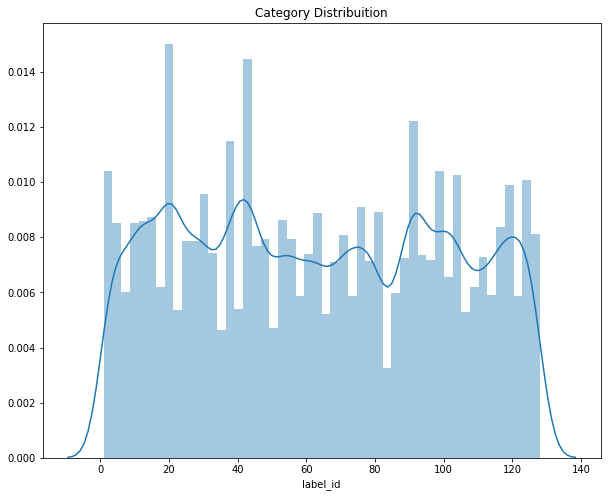

In [13]:
#Class distribution
plt.figure(figsize = (10, 8))
plt.title('Category Distribuition')
sns.distplot(train_data['label_id'])

plt.show()

## Most frequent labels in training data set

In [14]:
# Occurance of label_id in decreasing order(Top categories)
temp = pd.DataFrame(train_data.label_id.value_counts().head(8))
temp.reset_index(inplace=True)
temp.columns = ['label_id','count']
display(temp)

,label_id,count
0,20,3996
1,42,3973
2,92,2666
3,12,2609
4,125,2598
5,21,2577
6,122,2462
7,3,2368


In [15]:
print(list(set(train_data.label_id)))
print(list(set(val_data.label_id)))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115,